# Projet Data Management


Dans ce projet, nous allons explorer et analyser un jeu de données relatif aux prix des actions cotées sur la Bourse de New York (NYSE), accessible via le lien suivant: https://www.kaggle.com/datasets/dgawlik/nyse

Le dataset contient 4 différents fichiers :

fundamentals.csv (KPI financiers des entreprises)
prices-split-adjusted.csv (prix ajustés)
prices.csv (le fichier principal, avec les prix par jour, mais sans les noms et détails des entreprises)
securities.csv (le fichier contenant les noms & secteurs des différentes entreprises)

Ainsi, nous utiliserons uniquement prices.csv et securities.csv pour notre application, afin de connaître les prix des entreprises chaque jours.

## Importation des libraries nécessaires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import os
import numpy as np

## Analyse des données

Le fichier prices.csv contient des informations quotidiennes sur les actions, principalement entre 2010 et 2016, avec un certain nombre de splits d'actions à prendre en compte.

L'objectif principal est d'effectuer une exploration et une analyse des données, puis de préparer ces données pour les visualiser et les interpréter efficacement à l'aide de Streamlit. Le fichier prices.csv contient les informations suivantes :

Période couverte : Le dataset couvre principalement la période de 2010 à la fin de 2016. Pour certaines entreprises récemment cotées, la période sera plus courte.

Données : Le fichier contient les prix journaliers des actions, sans tenir compte des ajustements liés aux splits d'actions. Voici les principales variables du fichier :

Date : La date d'enregistrement des prix (format : datetime).

Open : Le prix d'ouverture de l'action pour la journée.

High : Le prix le plus élevé atteint par l'action pendant la journée.

Low : Le prix le plus bas atteint par l'action pendant la journée.

Close : Le prix de clôture de l'action pour la journée.

Adj Close : Le prix ajusté de clôture (après ajustements pour les splits et dividendes).

Volume : Le nombre d'actions échangées pendant la journée.

### I- Analyse exploratoire (prices.csv)

In [81]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Aller un niveau au-dessus du notebook
data_path = os.path.join(BASE_DIR, "data", "prices.csv")

# Charger le fichier CSV
prices = pd.read_csv(data_path)
print(prices.head())


                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


Nous commencerons par examiner le nombre d'observations et de variables dans notre jeu de données. Cela nous donnera une idée de la taille du dataset.

In [55]:
print(f"Nombre d'observations : {prices.shape[0]}")
print(f"Nombre de variables : {prices.shape[1]}")

Nombre d'observations : 851264
Nombre de variables : 7


Il est important de vérifier les types de chaque variable afin de comprendre comment elles sont structurées afin d'avoir plus de visibilité pour la suite du projet (numériques, catégorielles, temporelles).

In [56]:
prices.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

Une étape cruciale dans l'exploration des données est de vérifier si des valeurs manquantes sont présentes dans le dataset. Cela peut affecter les analyses futures. Dans le cas de notre base de données, nous avons aucune valeur manquante. 

In [57]:
prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [58]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


### I- Analyse exploratoire bis (securities.csv)

In [59]:
data_path = os.path.join(BASE_DIR, "data", "securities.csv")

securities = pd.read_csv(data_path)

In [60]:
print(securities.head())

  Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV               AbbVie     reports             Health Care   
3           ACN        Accenture plc     reports  Information Technology   
4          ATVI  Activision Blizzard     reports  Information Technology   

                GICS Sub Industry   Address of Headquarters Date first added  \
0        Industrial Conglomerates       St. Paul, Minnesota              NaN   
1           Health Care Equipment   North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals   North Chicago, Illinois       2012-12-31   
3  IT Consulting & Other Services           Dublin, Ireland       2011-07-06   
4     Home Entertainment Software  Santa Monica, California       2015-08-31   

       CIK  
0    66740  
1     1800  
2  1551152  
3  1467373

Le contenu de "securities.csv" nous permet, une fois merged sur "prices.csv" de découvrir les informations sur les tickers.

Avant de poursuivre, nous devons analyser la forme et les valeurs du dataset.

In [61]:
print(f"Nombre d'observations : {securities.shape[0]}")
print(f"Nombre de variables : {securities.shape[1]}")
print("") # espace pour séparer les observations
print(f"Le type de données:\n{securities.dtypes}")
print("") # espace pour séparer les observations
print(f"Nombres de valeurs manquantes:\n{securities.isnull().sum()}")
print(securities.describe())

Nombre d'observations : 505
Nombre de variables : 8

Le type de données:
Ticker symbol              object
Security                   object
SEC filings                object
GICS Sector                object
GICS Sub Industry          object
Address of Headquarters    object
Date first added           object
CIK                         int64
dtype: object

Nombres de valeurs manquantes:
Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64
                CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06


Les données sont déjà traitées, sans valeurs manquantes. Nous devrons cependant prêter attention au type de données des dates afin d'éviter les erreurs.

### II - Merge des données

In [62]:
final_prices = pd.merge(prices, securities, how='inner', left_on='symbol', right_on='Ticker symbol')
final_prices

,date,symbol,open,close,low,high,volume,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, United Kingdom",2016-01-05,1140536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,AIV,Apartment Investment & Mgmt,reports,Real Estate,REITs,"Denver, Colorado",NaN,922864


Il y a un soucis manifeste dans les dates, 2 types de formats visibles. Assurons nous de la continuité des données

In [63]:
# Calculer la longueur de chaque valeur dans la colonne 'date'
final_prices['date_length'] = final_prices['date'].astype(str).apply(len)

# Compter les occurrences de chaque taille
length_counts = final_prices['date_length'].value_counts()

# Afficher les résultats
print(length_counts)


date_length
10    849125
19      2139
Name: count, dtype: int64


Effectivement il existe 2 types de formats dans les dates : YYYY/MM/DD et YYYY/MM/DD HH:MM:SS. Nous allons tronquer toutes les valeurs à leurs 10 premiers caractères 10 afin de les convertir en dates du même type

In [64]:
# Tronquer les dates à 10 caractères
final_prices['date'] = final_prices['date'].astype(str).str[:10]

# Convertir les dates tronquées en format datetime
final_prices['date'] = pd.to_datetime(final_prices['date'], format='%Y-%m-%d', errors='coerce')
final_prices.drop(columns=['date_length'], inplace=True)

# Vérifier les NaT après conversion
invalid_dates = final_prices[final_prices['date'].isna()]
print("Dates invalides après conversion :")
print(invalid_dates)


Dates invalides après conversion :
Empty DataFrame
Columns: [date, symbol, open, close, low, high, volume, Ticker symbol, Security, SEC filings, GICS Sector, GICS Sub Industry, Address of Headquarters, Date first added, CIK]
Index: []


Cette étape réalisée, nous pouvons convertir sans risques les données en format datetime grace à pandas:

In [65]:
final_prices['date'] = pd.to_datetime(final_prices['date'], errors='coerce')
# Trier les données par la colonne 'date'
final_prices = final_prices.sort_values(by='date')

# Réinitialiser l'index après le tri, nous faisons ceci car nous manipuleront ce résultat final pour les visualisations ultérieures
final_prices.reset_index(drop=True, inplace=True)
final_prices

,date,symbol,open,close,low,high,volume,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0,SYMC,Symantec Corp.,reports,Information Technology,Application Software,"Mountain View, California",2003-03-25,849399
1,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0,IFF,Intl Flavors & Fragrances,reports,Materials,Specialty Chemicals,"New York, New York",1976-03-31,51253
2,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0,ILMN,Illumina Inc,reports,Health Care,Life Sciences Tools & Services,"San Diego, California",2015-11-19,1110803
3,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0,INTC,Intel Corp.,reports,Information Technology,Semiconductors,"Santa Clara, California",1976-12-31,50863
4,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0,INTU,Intuit Inc.,reports,Information Technology,Internet Software & Services,"Mountain View, California",2000-12-05,896878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0,ES,Eversource Energy,reports,Utilities,MultiUtilities,"Springfield, Massachusetts",NaN,72741
851260,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0,EQT,EQT Corporation,reports,Energy,Oil & Gas Exploration & Production,"Pittsburgh, Pennsylvania",2008-12-19,33213
851261,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0,EQR,Equity Residential,reports,Real Estate,REITs,"Chicago, Illinois",NaN,906107
851262,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0,EXR,Extra Space Storage,reports,Real Estate,Specialized REITs,"Salt Lake City, UT",2016-01-19,1289490


### III - Nouvelles variables et premières visualisations

Nous avions plusieurs idées pour la création de variables. Nous avons décidé de commencer par un simple ranking quotidien des entreprises, par volumes de transactions enregistrés.

In [66]:
# Popularité journalière par entreprise
daily_popularity = final_prices.groupby(['date', 'symbol'])['volume'].sum().reset_index()

# Renommer les colonnes pour clarifier
daily_popularity.rename(columns={'volume': 'daily_volume'}, inplace=True)
final_prices['daily_rank_volume'] = final_prices.groupby('date')['volume'].rank(ascending=False, method='dense')
final_prices["daily_rank_volume"]

0          81.0
1         462.0
2         322.0
3           7.0
4         270.0
          ...  
851259    277.0
851260    310.0
851261    265.0
851262    379.0
851263    418.0
Name: daily_rank_volume, Length: 851264, dtype: float64

Une seconde idée, qui pourrait nous servir pour évaluer les rendements des entreprises, est de calculer les daily returns (un simple pourcentage de différence entre la valeur précédente et la suivante)

In [67]:
# Calcul des rendements journaliers
final_prices['daily_return'] = final_prices.groupby('symbol')['close'].pct_change() * 100

# Aperçu des rendements journaliers
final_prices


,date,symbol,open,close,low,high,volume,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK,daily_rank_volume,daily_return
0,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0,SYMC,Symantec Corp.,reports,Information Technology,Application Software,"Mountain View, California",2003-03-25,849399,81.0,NaN
1,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0,IFF,Intl Flavors & Fragrances,reports,Materials,Specialty Chemicals,"New York, New York",1976-03-31,51253,462.0,NaN
2,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0,ILMN,Illumina Inc,reports,Health Care,Life Sciences Tools & Services,"San Diego, California",2015-11-19,1110803,322.0,NaN
3,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0,INTC,Intel Corp.,reports,Information Technology,Semiconductors,"Santa Clara, California",1976-12-31,50863,7.0,NaN
4,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0,INTU,Intuit Inc.,reports,Information Technology,Internet Software & Services,"Mountain View, California",2000-12-05,896878,270.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0,ES,Eversource Energy,reports,Utilities,MultiUtilities,"Springfield, Massachusetts",NaN,72741,277.0,-0.611841
851260,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0,EQT,EQT Corporation,reports,Energy,Oil & Gas Exploration & Production,"Pittsburgh, Pennsylvania",2008-12-19,33213,310.0,-0.335265
851261,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0,EQR,Equity Residential,reports,Real Estate,REITs,"Chicago, Illinois",NaN,906107,265.0,1.067841
851262,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0,EXR,Extra Space Storage,reports,Real Estate,Specialized REITs,"Salt Lake City, UT",2016-01-19,1289490,379.0,2.182831


Afin de réaliser des comparaisons plus approfondies, nous avons également décidé de créer une variable correspondant aux rendements normalisés, ce qui permet, contrairement au % de changement quotidien, de comparer plusieurs groupes entre eux.

In [68]:
final_prices['normalized_close'] = final_prices.groupby('symbol')['close'].transform(lambda x: x / x.iloc[0] * 100)

Pour vérifié notre nouvelle variable nous avons essayé de comparer les différents secteurs du NYSE pour voir si certains surperformaient:

        date             GICS Sector  normalized_close
0 2010-01-04  Consumer Discretionary             100.0
1 2010-01-04        Consumer Staples             100.0
2 2010-01-04                  Energy             100.0
3 2010-01-04              Financials             100.0
4 2010-01-04             Health Care             100.0
Taille des données agrégées : (19382, 3)


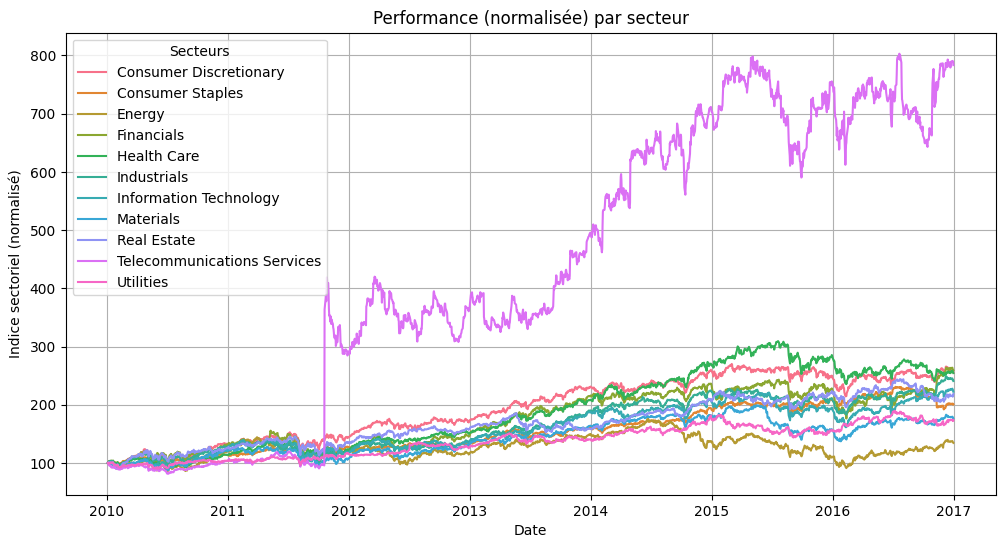

In [ ]:
# Agréger les données par date et secteur (moyenne des 'normalized_close')
sector_indices = final_prices.groupby(['date', 'GICS Sector'])['normalized_close'].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_indices, x='date', y='normalized_close', hue='GICS Sector')
plt.title('Performance (normalisée) par secteur')
plt.xlabel('Date')
plt.ylabel('Indice sectoriel (normalisé)')
plt.legend(loc='upper left', title='Secteurs')
plt.grid()
plt.show()


Bien que computées correctement, l'évolution des télécom laisse supposer une ou plusieurs valeurs aberrantes, risquant de compliquer notre analyse plus tard. Nous pouvons donc procéder à sa recherche, puis à son isolation ou à sa diminution.

In [70]:
#isolons nos données des télécoms avant de trouver l'anomalie
telecom_data = final_prices[final_prices['GICS Sector'] == 'Telecommunications Services']
print(telecom_data['Security'].unique())

['Level 3 Communications' 'Frontier Communications' 'AT&T Inc'
 'Verizon Communications' 'CenturyLink Inc']


Nous avons donc 5 entreprises possible. Pour déterminer le problème nous pouvons regarder leurs valeurs iniatiales et finales dans les données

In [71]:
telecom_initials = telecom_data.groupby(['symbol','Security'])['close'].first()
print("Prix initiaux des entreprises Télécom :")
print(telecom_initials)

telecom_final = telecom_data.groupby(['symbol','Security'])['close'].last()
print("Prix initiaux des entreprises Télécom :")
print(telecom_final)

Prix initiaux des entreprises Télécom :
symbol  Security               
CTL     CenturyLink Inc            36.660000
FTR     Frontier Communications     7.960000
LVLT    Level 3 Communications      1.610000
T       AT&T Inc                   28.580000
VZ      Verizon Communications     33.279869
Name: close, dtype: float64
Prix initiaux des entreprises Télécom :
symbol  Security               
CTL     CenturyLink Inc            23.780001
FTR     Frontier Communications     3.380000
LVLT    Level 3 Communications     56.360001
T       AT&T Inc                   42.529999
VZ      Verizon Communications     53.380001
Name: close, dtype: float64


L'erreur parait provenir de la normalisation de LVLT (Level 3 Communications), donc le cours a été multiplié par une cinquantaine de fois en raison d'une valeur très basse à l'origne

In [72]:
print("Valeurs maximales pour les télécoms :")
print(telecom_data[['date', 'symbol', 'normalized_close']].sort_values(by='normalized_close', ascending=False).head(1000))

Valeurs maximales pour les télécoms :
             date symbol  normalized_close
844871 2016-12-13   LVLT       3552.795093
793676 2016-07-20   LVLT       3551.552795
837353 2016-11-21   LVLT       3537.888137
849882 2016-12-28   LVLT       3534.161615
794677 2016-07-22   LVLT       3534.161615
...           ...    ...               ...
318551 2012-09-11   LVLT       1395.030994
326412 2012-10-04   LVLT       1395.030994
280951 2012-05-17   LVLT       1394.410000
425908 2013-08-05   LVLT       1393.167702
272820 2012-04-24   LVLT       1391.925466

[1000 rows x 3 columns]


Et si l'on print les plus grandes valeurs normalized, c'est elle qui monopolise le classement de 2012 à 2016, confirmant notre hypothèse d'un courbe affectée par une valeur extrême.

C:\Users\paule\AppData\Local\Temp\ipykernel_12944\809279899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data['daily_return'] = telecom_data.groupby('symbol')['close'].pct_change() * 100
C:\Users\paule\AppData\Local\Temp\ipykernel_12944\809279899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data['cumulative_return'] = telecom_data.groupby('symbol')['daily_return'].cumsum()


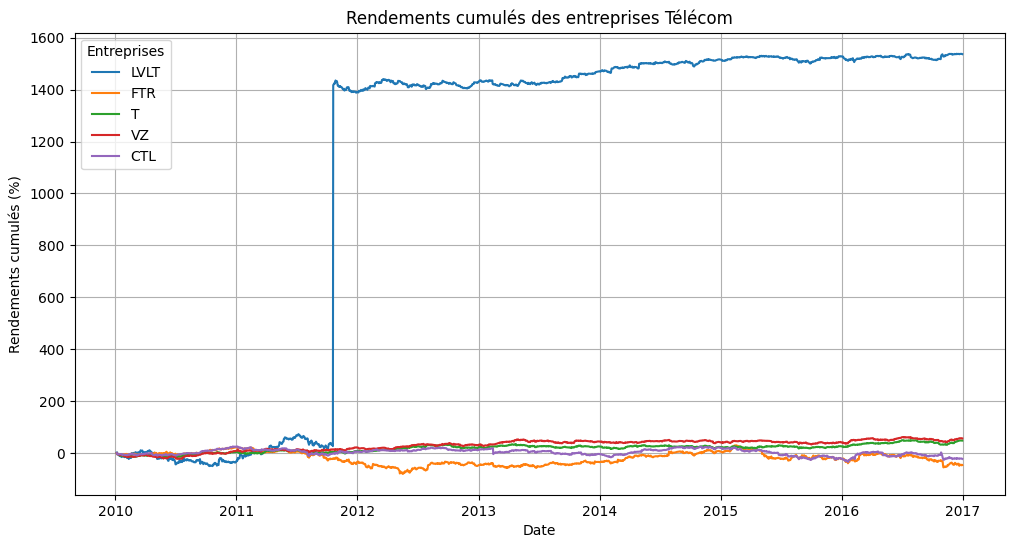

In [73]:
# Calculer les rendements journaliers
telecom_data['daily_return'] = telecom_data.groupby('symbol')['close'].pct_change() * 100

# Calculer les rendements cumulés
telecom_data['cumulative_return'] = telecom_data.groupby('symbol')['daily_return'].cumsum()

# Visualiser les rendements cumulés
plt.figure(figsize=(12, 6))
sns.lineplot(data=telecom_data, x='date', y='cumulative_return', hue='symbol')
plt.title('Rendements cumulés des entreprises Télécom')
plt.xlabel('Date')
plt.ylabel('Rendements cumulés (%)')
plt.legend(loc='upper left', title='Entreprises')
plt.grid()
plt.show()


In [74]:
# Filtrer les données de LVLT autour de 2012
lvlt_data = telecom_data[telecom_data['symbol'] == 'LVLT']
lvlt_anomaly = lvlt_data[(lvlt_data['date'] >= '2011-01-01') & (lvlt_data['date'] <= '2013-01-01')]

# Afficher les prix et rendements
print(lvlt_anomaly[['date', 'close', 'daily_return', 'cumulative_return']])


             date      close  daily_return  cumulative_return
118331 2011-01-03   1.040000      6.122449         -27.222626
118671 2011-01-04   1.030000     -0.961538         -28.184164
119142 2011-01-05   1.130000      9.708738         -18.475426
119611 2011-01-06   1.130000      0.000000         -18.475426
120083 2011-01-07   1.110000     -1.769912         -20.245338
...           ...        ...           ...                ...
351791 2012-12-24  22.920000      0.000000        1427.534304
352262 2012-12-26  22.680000     -1.047120        1426.487184
352862 2012-12-27  22.850000      0.749559        1427.236743
353203 2012-12-28  22.540001     -1.356670        1425.880073
353801 2012-12-31  23.110001      2.528838        1428.408911

[502 rows x 4 columns]


Il existe plusieurs solutions pour pallier à ce défaut des rendements simples. Nous pouvons:
- Supprimer la variable extrême (simple mais non satisfaisant)
- Imposer une variation maximale (implique de modifier les données)
- Calculer les rendements logarithmiques, qui n'auront pas ce défaut de favoriser les faibles valeurs de départ (méthode la plus satisfaisante ici)

In [77]:
# Calcul des rendements logarithmiques
final_prices['log_return'] = final_prices.groupby('symbol')['close'].transform(lambda x: np.log(x / x.shift(1)))

Réessayons de faire apparaître sur un graphique les performances par secteur:

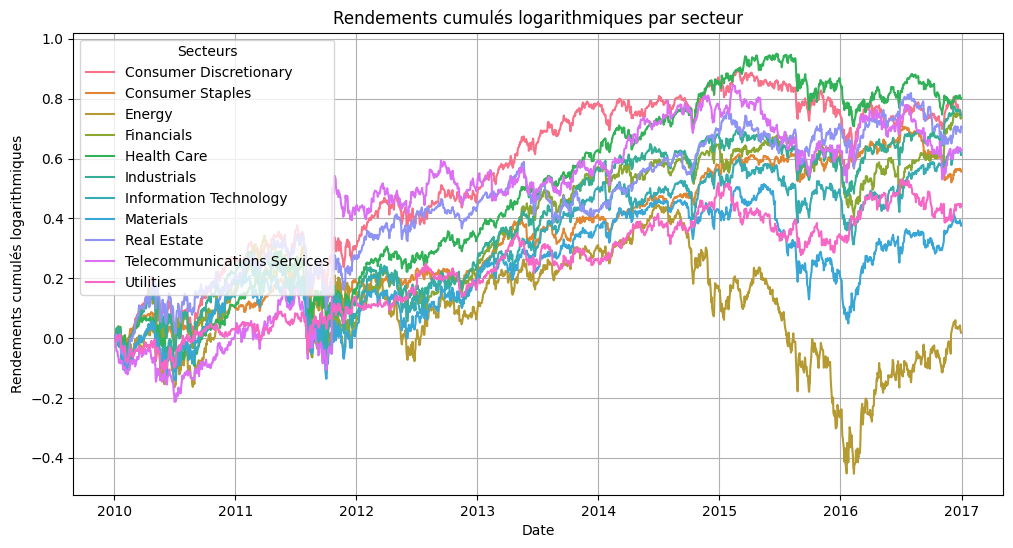

In [76]:
# Moyenne des rendements logarithmiques par secteur pour chaque jour
sector_log_returns = final_prices.groupby(['date', 'GICS Sector'])['log_return'].mean().reset_index()

# Calcul des rendements cumulés logarithmiques par secteur
sector_log_returns['cumulative_log_return'] = sector_log_returns.groupby('GICS Sector')['log_return'].cumsum()

# Visualisation des rendements cumulés logarithmiques par secteur
plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_log_returns, x='date', y='cumulative_log_return', hue='GICS Sector')
plt.title('Rendements cumulés logarithmiques par secteur')
plt.xlabel('Date')
plt.ylabel('Rendements cumulés logarithmiques')
plt.legend(loc='upper left', title='Secteurs')
plt.grid()
plt.show()

Les courbes sont désormais bien plus cohérentes

## Conclusion

Nous avons comme la consigne le demandait :

- Analysé les données de départ et corrigé les éventuels problèmes

- Créé plusieurs variables après le merge des données :
   - Daily returns
   - Normalized returns
   - Rendements logarithmiques